# 3장. 네이버 영화 평점 분석

## 1. 네이버 영화 평점 분석 기준 영화의 평점 변화 확인하기

In [1]:
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
from urllib.request import urlopen

page = urlopen('https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20200111')

soup = BeautifulSoup(page, 'html.parser')
soup

tps://ssl.pstatic.net/imgmovie/2007/img/common/icon_na_1.gif" width="7"/></td>
<td class="range ac">0</td>
</tr>
<tr>
<td class="ac"><img alt="43" height="13" src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_g43.gif" width="14"/></td>
<td class="title">
<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=181584" title="아내를 죽였다">아내를 죽였다</a>
</div>
</td>
<!-- 평점순일 때 평점 추가하기  -->
<td><div class="point_type_2"><div class="mask" style="width:51.39999866485596%"><img alt="" height="14" src="https://ssl.pstatic.net/imgmovie/2007/img/common/point_type_2_bg_on.gif" width="79"/></div></div></td>
<td class="point">5.14</td>
<td class="ac"><a class="txt_link" href="/movie/point/af/list.nhn?st=mcode&amp;sword=181584">평점주기</a></td>
<!----------------------------------------->
<td class="ac"><img alt="na" class="arrow" height="10" src="https://ssl.pstatic.net/imgmovie/2007/img/common/icon_na_1.gif" width="7"/></td>
<td class="range ac">0</td>
</tr>
<tr>
<td class="ac"><img alt="44" 

In [3]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=181710" title="포드 V 페라리">포드 V 페라리</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=189111" title="두 교황">두 교황</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=190244" title="러브 앳">러브 앳</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183132" title="교회오빠">교회오빠</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=150376" title="나, 다니엘 블레이크">나, 다니엘 블레이크</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=29059" title="피아니스트의 전설">피아니스트의 전설</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=190395" title="눈의 여왕4">눈의 여왕4</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=189000" title="나이브스 아웃">나이브스 아웃</a>
 

In [11]:
soup.find_all('div', 'tit5')[0].a.string # 제목만 찾기

'포드 V 페라리'

In [7]:
soup.find_all('td', 'point')[0].string  # 평점 포인트만 찾기

'9.55'

In [15]:
# 날짜를 2019-10-1부터 100일간 정의 후 그 날짜에 해당하는 영화 정보 전체 찾기
date = pd.date_range('2019-10-1', periods=100, freq='D')
date

DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
               '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12',
               '2019-10-13', '2019-10-14', '2019-10-15', '2019-10-16',
               '2019-10-17', '2019-10-18', '2019-10-19', '2019-10-20',
               '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24',
               '2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28',
               '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01',
               '2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05',
               '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09',
               '2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
               '2019-11-22', '2019-11-23', '2019-11-24', '2019-11-25',
      

In [17]:
import urllib
from tqdm import tqdm

movie_date = []
movie_name = []
movie_point = []

for today in tqdm(date):
    html = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'

    response = urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, 'html.parser')

    end = len(soup.find_all('td', 'point'))

    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


In [28]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie

,date,name,point
0,2019-10-01,사랑의 선물,9.64
1,2019-10-01,주전장,9.54
2,2019-10-01,안녕 베일리,9.46
3,2019-10-01,알라딘,9.39
4,2019-10-01,폴란드로 간 아이들,9.33
5,2019-10-01,교회오빠,9.28
6,2019-10-01,로마의 휴일,9.22
7,2019-10-01,타샤 튜더,9.04
8,2019-10-01,벌새,8.97
9,2019-10-01,마담 프루스트의 비밀정원,8.91


In [29]:
movie.info()  # point가 숫자형이 아님

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4506 entries, 0 to 4505
Data columns (total 3 columns):
date     4506 non-null datetime64[ns]
name     4506 non-null object
point    4506 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 105.7+ KB


In [30]:
movie['point'] = movie['point'].astype(float)  # float으로 변경

In [31]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4506 entries, 0 to 4505
Data columns (total 3 columns):
date     4506 non-null datetime64[ns]
name     4506 non-null object
point    4506 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 105.7+ KB


In [32]:
# 영화별로 점수 합산 -> pivot table
# aggfunc=np.sum을 이용해서 합산
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
교회오빠,927.18
벌새,890.56
주전장,883.75
기생충,831.42
조커,774.33


In [33]:
# 영화명으로 검색
tmp = movie.query("name == ['조커']")
tmp

,date,name,point
41,2019-10-02,조커,9.27
77,2019-10-03,조커,9.12
113,2019-10-04,조커,9.05
150,2019-10-05,조커,8.98
190,2019-10-06,조커,8.91
224,2019-10-07,조커,8.87
257,2019-10-08,조커,8.86
290,2019-10-09,조커,8.83
321,2019-10-10,조커,8.82
355,2019-10-11,조커,8.80


/Users/nani/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


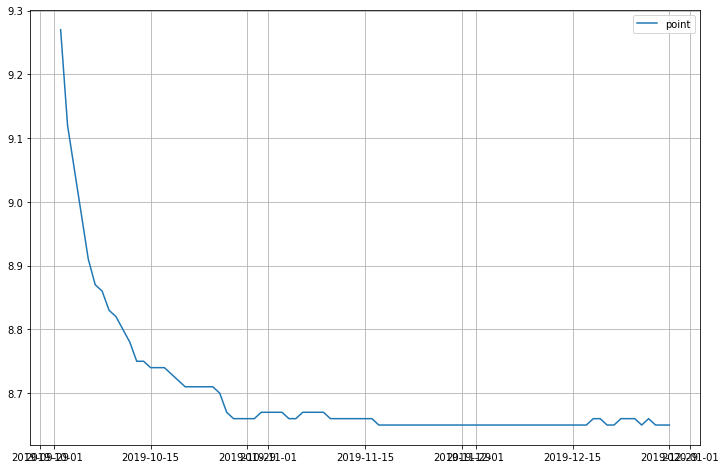

In [34]:
# 그래프로 그려보기
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

## 2. 영화별 날짜 변화에 따른 평점 변화 확인하기

In [35]:
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
movie_pivot.head()

point                                                    \
name       21 브릿지: 테러 셧다운 47미터 2 7번방의 선물 80일간의 세계일주 82년생 김지영 가버나움 가장 보통의 연애   
date                                                                          
2019-10-01            NaN   7.29     NaN        NaN      NaN  NaN       NaN   
2019-10-02            NaN   7.29     NaN        NaN      NaN  NaN      8.25   
2019-10-03            NaN   7.29     NaN        NaN      NaN  NaN      8.36   
2019-10-04            NaN   7.29     NaN        NaN      NaN  NaN      8.36   
2019-10-05            NaN   7.29     NaN        NaN      NaN  NaN      8.33   

                                ...                                            \
name       감쪽같은 그녀 겨울왕국 겨울왕국 2  ... 프란시스 하 피아니스트의 전설 하이큐!! 끝과 시작 하이큐!! 승자와 패자   
date                            ...                                             
2019-10-01     NaN  NaN    NaN  ...    NaN       NaN         NaN          NaN   
2019-10-02     NaN  NaN    NaN  ...    NaN       NaN         NaN          NaN   
2019-10-03     NaN  NaN    NaN  ...    NaN       NaN         NaN          NaN   
2019-10-04     NaN  NaN    NaN  ...    NaN       NaN         NaN          NaN   
2019-10-05     NaN  NaN    NaN  ...    NaN       NaN         NaN          NaN   

                                                                         
name       하이큐!! 재능과 센스 항거:유관순 이야기 해피 엔드 행동하는 양심 김대중 헌터 킬러 힘을 내요, 미스터 리  
date                                                                     
2019-10-01          NaN        NaN   NaN         NaN   NaN         7.61  
2019-10-02          NaN        NaN   NaN         NaN   NaN         7.60  
2019-10-03          NaN        NaN   NaN         NaN   NaN         7.59  
2019-10-04          NaN        NaN   NaN         NaN   NaN         7.58  
2019-10-05          NaN        NaN   NaN         NaN   NaN         7.58  

[5 rows x 210 columns]

In [36]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [38]:
movie_pivot.head()

name,21 브릿지: 테러 셧다운,47미터 2,7번방의 선물,80일간의 세계일주,82년생 김지영,가버나움,가장 보통의 연애,감쪽같은 그녀,겨울왕국,겨울왕국 2,...,프란시스 하,피아니스트의 전설,하이큐!! 끝과 시작,하이큐!! 승자와 패자,하이큐!! 재능과 센스,항거:유관순 이야기,해피 엔드,행동하는 양심 김대중,헌터 킬러,"힘을 내요, 미스터 리"
date,,,,,,,,,,,,,,,,,,,,,
2019-10-01,NaN,7.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.61
2019-10-02,NaN,7.29,NaN,NaN,NaN,NaN,8.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.60
2019-10-03,NaN,7.29,NaN,NaN,NaN,NaN,8.36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.59
2019-10-04,NaN,7.29,NaN,NaN,NaN,NaN,8.36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.58
2019-10-05,NaN,7.29,NaN,NaN,NaN,NaN,8.33,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.58


In [39]:
# 폰트정리
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Unknown system..')

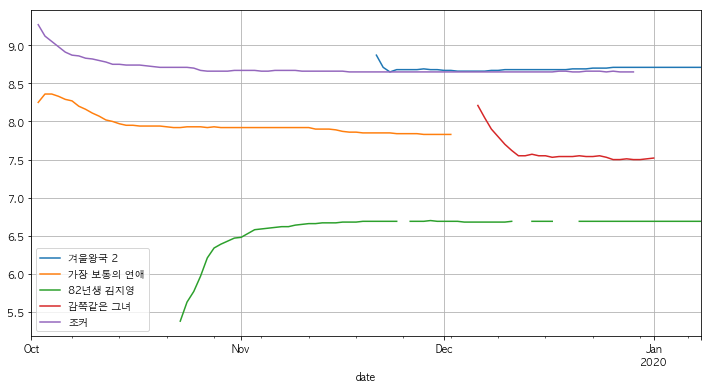

In [47]:
movie_pivot.plot(y=['겨울왕국 2', '가장 보통의 연애', '82년생 김지영', '감쪽같은 그녀', '조커'], figsize=(12,6))
plt.legend(loc='best')
plt.grid()
plt.show()